# modelの評価
## testデータを用いて正解率をそれぞれのモデルで出す

### 関数の仕様
* モデルのパスとtestディレクトリのパスを引数に入れたら600枚程度の画像で検証をする  
#### 返り値
* 全体における正解率 scaler
* 各予測のone hotベクトルの累積和(20, 20)
* 各画像ごとの分布確率(20, 20)
* 正解ラベル名、画像のパス、間違えた画像の全てのラベルに対する確率(dataframe)(N, 22)

In [1]:
import os
import numpy as np
import pandas as pd
from keras import models
from keras.preprocessing import image
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
INPUT_SIZE = 256

Using TensorFlow backend.


In [9]:
def evaluate_model(model_path, test_pathes, classes):
    model = models.load_model(model_path)
    classes_num = len(classes)
    cumulative_sum = np.zeros((classes_num, classes_num))
    probability = np.zeros((classes_num, classes_num))
    all_pictures_num = 0
    accuracy = 0
    columns = classes + ["LABEL", "PATH"]
    df1 = pd.DataFrame(columns=columns)
    for i, test_path in tqdm(enumerate(test_pathes),total=len(classes)):
        pictures_num = len(test_path)
        all_pictures_num += pictures_num
        for img_path in test_path:
            img = image.load_img(img_path, target_size=(INPUT_SIZE, INPUT_SIZE))
            x = image.img_to_array(img)/255.0
            x = np.expand_dims(x, axis=0)
            preds = model.predict(x)
            ans = np.argmax(preds[0])
            cumulative_sum[i][ans] += 1
            probability[i][ans] += 1
            accuracy += int(i == ans)
            if i != ans:
                content = list(preds[0])+[classes[i],img_path]
#                 print(content)
                df2 = pd.DataFrame( [content], columns=columns)
                df1 = pd.concat([df1, df2])
        probability[i] /= pictures_num
    return accuracy/all_pictures_num, cumulative_sum, probability, df1.reset_index(drop=True,inplace=True)

In [3]:
base_dir = 'mini_pictures'
test_dir = os.path.join(base_dir,'test')

mini_metadata = pd.read_csv('mini_metadata.csv',index_col=0)
classes = list(mini_metadata["make_model"].value_counts().index)
classes = sorted(classes)
classes_num = len(classes)
# print(classes)
# print(classes_num)

model_path = 'models/VGG16_mini_3.h5'
# pictures_files = os.listdir(test_dir)
test_pathes = []
for i in range(classes_num):
    pre_path = os.path.join(test_dir, classes[i])
    test_pathes.append([os.path.join(pre_path, fname) for fname in  os.listdir(pre_path)])

['Audi-a3', 'Audi-a5', 'Audi-q5', 'BMW-1-series', 'BMW-4-series', 'BMW-x3', 'Honda-pilot', 'Jeep-wrangler', 'MINI-clubman', 'MINI-countryman', 'Mazda-mazda5', 'Mercedes-Benz-gla', 'Mercedes-Benz-glk', 'Mitsubishi-outlander', 'Nissan-370z', 'Nissan-quest', 'Nissan-rogue-select', 'Subaru-outback', 'Toyota-tacoma', 'Volkswagen-cc']
20


In [4]:
acc, cumulative_sum, probability, df1 = evaluate_model(model_path, test_pathes, classes)

 15%|████████████▍                                                                      | 3/20 [01:01<05:41, 20.07s/it]

[0.16702755, 0.017825589, 6.3133825e-08, 0.28470695, 0.48287967, 5.309386e-07, 4.5011915e-12, 6.943061e-13, 0.0038665845, 0.0035338812, 0.002811214, 0.0003092996, 6.613119e-08, 0.016989302, 0.0007972603, 1.6963457e-11, 3.817079e-06, 0.019228978, 1.4575206e-08, 1.9285504e-05, 'BMW-1-series', 'mini_pictures\\test\\BMW-1-series\\BMW-1-series_bf9932f7aca8_04.jpg']


 20%|████████████████▌                                                                  | 4/20 [01:20<05:17, 19.83s/it]

[0.020723026, 0.75862825, 4.504621e-06, 9.5859716e-05, 0.20187773, 5.758943e-06, 2.7591468e-14, 1.5046194e-16, 1.7171914e-06, 3.813632e-09, 9.452717e-06, 0.00017431275, 1.458966e-10, 7.337356e-08, 2.9464269e-05, 2.4685515e-14, 1.4763265e-07, 3.2083499e-06, 3.472363e-10, 0.0184464, 'BMW-4-series', 'mini_pictures\\test\\BMW-4-series\\BMW-4-series_7e097d195756_07.jpg']


 25%|████████████████████▊                                                              | 5/20 [01:33<04:29, 17.96s/it]

[1.5922412e-08, 4.008284e-06, 0.11499065, 2.8220254e-10, 1.3750508e-11, 0.062132522, 0.00015251603, 8.987292e-08, 1.5581844e-07, 0.00013899834, 2.4284084e-06, 1.2712251e-06, 0.00026225223, 0.8221851, 6.970655e-11, 6.2447026e-07, 1.2849307e-05, 0.000115063456, 1.5063339e-06, 1.0441619e-11, 'BMW-x3', 'mini_pictures\\test\\BMW-x3\\BMW-x3_3d7a1030deeb_07.jpg']
[3.3971694e-06, 4.9435996e-05, 0.7461432, 3.233646e-11, 2.2265256e-09, 0.23201673, 2.082703e-06, 6.9837163e-09, 1.8878113e-06, 0.0036611385, 2.5694662e-06, 0.00167587, 0.0010437847, 0.0015495421, 1.0732371e-05, 7.5432766e-10, 0.013779189, 6.0399278e-05, 2.946663e-10, 6.122732e-09, 'BMW-x3', 'mini_pictures\\test\\BMW-x3\\BMW-x3_3d7a1030deeb_13.jpg']


 30%|████████████████████████▉                                                          | 6/20 [02:02<04:58, 21.29s/it]

[1.7267805e-09, 1.155847e-07, 1.7940512e-05, 7.891843e-06, 1.5543064e-07, 6.1530205e-05, 0.47076547, 2.692129e-07, 0.00010921264, 0.0011945717, 5.531492e-07, 9.382803e-08, 0.00019728084, 2.860727e-07, 2.9538633e-10, 6.7066167e-06, 0.00010310592, 0.5256011, 0.0019336197, 2.6870184e-08, 'Honda-pilot', 'mini_pictures\\test\\Honda-pilot\\Honda-pilot_82d30a8001ee_01.jpg']
[1.0859721e-11, 1.4103017e-14, 0.0018774024, 3.7217363e-10, 1.3161497e-09, 0.042983238, 0.16815315, 3.8997788e-11, 7.256325e-07, 1.5225315e-06, 0.533839, 9.08159e-07, 0.13737893, 0.0036218779, 1.4526091e-15, 0.11208441, 2.2960827e-05, 7.980611e-07, 3.5140234e-05, 4.6996252e-12, 'Honda-pilot', 'mini_pictures\\test\\Honda-pilot\\Honda-pilot_ba0542f7cfce_03.jpg']


 40%|█████████████████████████████████▏                                                 | 8/20 [03:04<05:22, 26.86s/it]

[1.0253262e-06, 2.9148292e-05, 7.4011145e-06, 1.1473421e-06, 8.8474843e-07, 5.1389475e-06, 4.969451e-10, 5.492881e-06, 0.21746367, 0.50365275, 7.254669e-10, 0.017099094, 1.836615e-08, 9.140913e-07, 0.2616593, 1.2739389e-16, 7.375766e-05, 2.661685e-07, 1.1385676e-08, 8.9942404e-10, 'MINI-clubman', 'mini_pictures\\test\\MINI-clubman\\MINI-clubman_4f552e308808_01.jpg']
[1.4732023e-05, 2.7315834e-09, 4.4666315e-08, 0.007362852, 3.3448615e-08, 0.0002091078, 1.5304096e-06, 8.928524e-06, 0.0948343, 0.8057582, 0.0002465081, 1.3311823e-07, 0.00072122546, 0.078163, 2.787746e-08, 4.39206e-08, 2.5220508e-05, 0.011492449, 0.0011618058, 3.6891185e-10, 'MINI-clubman', 'mini_pictures\\test\\MINI-clubman\\MINI-clubman_75a904cbe432_08.jpg']


 55%|█████████████████████████████████████████████                                     | 11/20 [04:02<03:23, 22.65s/it]

[0.007074086, 0.00028270824, 0.519507, 1.0781117e-06, 5.599236e-06, 9.067679e-06, 1.7421144e-07, 3.7480782e-11, 0.0003631145, 6.311344e-06, 6.491125e-05, 0.4661714, 0.0064061773, 1.8020992e-05, 2.4914911e-08, 1.2347533e-10, 5.4195516e-05, 5.844737e-06, 2.6693256e-09, 3.0481286e-05, 'Mercedes-Benz-gla', 'mini_pictures\\test\\Mercedes-Benz-gla\\Mercedes-Benz-gla_24f0c97836fd_01.jpg']


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [06:11<00:59, 19.77s/it]

[9.4322146e-05, 2.489607e-08, 0.7007623, 6.529181e-05, 1.7127501e-10, 0.008338862, 2.3500702e-07, 6.355836e-11, 3.1803285e-08, 2.6362306e-06, 0.0002962184, 0.0028347585, 0.00015766578, 0.00075159984, 1.0099161e-11, 5.437453e-10, 9.9495854e-05, 0.28655532, 6.4997917e-06, 3.4739405e-05, 'Subaru-outback', 'mini_pictures\\test\\Subaru-outback\\Subaru-outback_459c9990f7aa_09.jpg']


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [06:31<00:39, 19.75s/it]

[2.3306355e-15, 8.9806984e-10, 6.5447675e-06, 7.151381e-11, 2.9646046e-07, 3.3882174e-07, 0.004307966, 1.0291298e-09, 4.832507e-07, 8.1088336e-07, 4.2565585e-05, 2.7554443e-09, 5.4369106e-05, 1.0239843e-05, 5.5234917e-15, 0.5556881, 2.629848e-07, 3.544848e-06, 0.43988448, 2.7184288e-12, 'Toyota-tacoma', 'mini_pictures\\test\\Toyota-tacoma\\Toyota-tacoma_e4fc9edc5c7b_02.jpg']


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [07:42<00:00, 26.77s/it]


In [10]:
# np.set_printoptions(precision=2, floatmode='fixed')
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
print(df1.shape)
print(acc)

(11, 22)


In [11]:
df1.head(11)

,Audi-a3,Audi-a5,Audi-q5,BMW-1-series,BMW-4-series,BMW-x3,Honda-pilot,Jeep-wrangler,MINI-clubman,MINI-countryman,Mazda-mazda5,Mercedes-Benz-gla,Mercedes-Benz-glk,Mitsubishi-outlander,Nissan-370z,Nissan-quest,Nissan-rogue-select,Subaru-outback,Toyota-tacoma,Volkswagen-cc,LABEL,PATH
0,0.17,0.02,0.00,0.28,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,BMW-1-series,mini_pictures\test\BMW-1-series\BMW-1-series_b...
1,0.02,0.76,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,BMW-4-series,mini_pictures\test\BMW-4-series\BMW-4-series_7...
2,0.00,0.00,0.11,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.82,0.00,0.00,0.00,0.00,0.00,0.00,BMW-x3,mini_pictures\test\BMW-x3\BMW-x3_3d7a1030deeb_...
3,0.00,0.00,0.75,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,BMW-x3,mini_pictures\test\BMW-x3\BMW-x3_3d7a1030deeb_...
4,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,Honda-pilot,mini_pictures\test\Honda-pilot\Honda-pilot_82d...
5,0.00,0.00,0.00,0.00,0.00,0.04,0.17,0.00,0.00,0.00,0.53,0.00,0.14,0.00,0.00,0.11,0.00,0.00,0.00,0.00,Honda-pilot,mini_pictures\test\Honda-pilot\Honda-pilot_ba0...
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.50,0.00,0.02,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.00,MINI-clubman,mini_pictures\test\MINI-clubman\MINI-clubman_4...
7,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.09,0.81,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.01,0.00,0.00,MINI-clubman,mini_pictures\test\MINI-clubman\MINI-clubman_7...
8,0.01,0.00,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Mercedes-Benz-gla,mini_pictures\test\Mercedes-Benz-gla\Mercedes-...
9,0.00,0.00,0.70,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,Subaru-outback,mini_pictures\test\Subaru-outback\Subaru-outba...


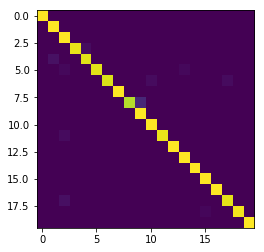

In [8]:
plt.imshow(probability)

In [13]:
prob = pd.DataFrame(probability, columns=classes)
prob.head(20)

,Audi-a3,Audi-a5,Audi-q5,BMW-1-series,BMW-4-series,BMW-x3,Honda-pilot,Jeep-wrangler,MINI-clubman,MINI-countryman,Mazda-mazda5,Mercedes-Benz-gla,Mercedes-Benz-glk,Mitsubishi-outlander,Nissan-370z,Nissan-quest,Nissan-rogue-select,Subaru-outback,Toyota-tacoma,Volkswagen-cc
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.97,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.05,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.02,0.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.89,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
